# THE LaCE EMULATORS WITH GADGET AND NYX SIMULATIONS

In [1]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# our modules
from lace.archive import gadget_archive
from lace.archive import nyx_archive
from lace.emulator.nn_emulator import NNEmulator
from lace.emulator.gp_emulator import GPEmulator
from lace.emulator import poly_p1d


/data/astro/scratch/lcabayol/anaconda3/envs/DESIenv6/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### A new version of the LaCE emulators including is now available in igmhub/LaCE: https://github.com/igmhub/LaCE


## GENERAL USAGE

There are two emulator objects:
- GPEmulator(**args)
- NNEmulator(**args)

And for both, we can call them specifying:
- A custom archive that we have externally generated
- A training set label (training_set), pointing the emulator to a pre-defined training set.

There is also the option of defining a pre-defined emulator with the same configuration as the emulator used in a given publication

## EXAMPLES

### A. HOW TO CREATE AN ARCHIVE

In [6]:
# Gadget archive with the post-processing using in Pedersen21
archive = gadget_archive.GadgetArchive(postproc="Pedersen21")

In [4]:
# Gadget archive with the post-processing using in Cabayol23
archive = gadget_archive.GadgetArchive(postproc="Cabayol23")

In the post-processing in Pedersen21, the P1D is measured along one axis, while in Cabayol23, we measure the P1D along the trhee axes.

In [15]:
# Gadget archive with the post-processing using in Cabayol23
archive = nyx_archive.NyxArchive()


KeyboardInterrupt



### B. HOW TO CALL AN EMULATOR

This emulators will use the default configuration from Pedersen21 and Cabayol23 respectively.

In [7]:
emulator_gp = GPEmulator(archive=archive)

Use custom archive provided by the user
Selected custom emulator
Training GP on 330 points
GPs optimised in 0.85 seconds


In [9]:
emulator_nn = NNEmulator(archive=archive, nepochs=1)

Selected custom emulator
Use custom archive provided by the user


### B. HOW TO CALL A PRE-DEFINED EMULATOR

When calling an emulator, we can also call a pre-defined emulator's configuration.
There are three possibilities:

    - Pedersen21: Configuration used in Pedersen21. kmax=3, kbin emulator (available for GP).
    - Pedesern23: Configuration used in Pedersen23. kmax=4, polyfit emulator (available for GP).
    - Cabayol23: Configuration used in Cabayol-Garcia 2023. kmax=4, polyfit emulator (available for NN).

In [12]:
emulator_gp = GPEmulator(archive=archive, emulator_label='Pedersen21')

Use custom archive provided by the user
Select emulator in Pedersen21
Gaussian Process emulator predicting the P1D at each k-bin. It goes to scales of 3Mpc^{-1} and z<4.5. The parameters passed to the emulator will be overwritten to match these ones.
Training GP on 330 points
GPs optimised in 1.80 seconds


In [13]:
emulator_nn = NNEmulator(archive=archive, emulator_label='Cabayol23')

Select emulator in Cabayol23
Neural network emulating the optimal P1D of Gadget simulations fitting coefficients to a 5th degree polynomial. It goes to scales of 4Mpc^{-1} and z<4.5. The parameters passed to the emulator will be overwritten to match these ones
Use custom archive provided by the user


### C. POINTING ALSO TO A PRE-DEFINED TRAINING SET

In [14]:
emulator_gp = GPEmulator(training_set='Pedersen21', emulator_label='Pedersen21')

Selected training set from Pedersen21
Select emulator in Pedersen21
Gaussian Process emulator predicting the P1D at each k-bin. It goes to scales of 3Mpc^{-1} and z<4.5. The parameters passed to the emulator will be overwritten to match these ones.
Training GP on 330 points
GPs optimised in 1.71 seconds


In [15]:
emulator_nn = NNEmulator(training_set='Cabayol23', emulator_label='Cabayol23')

Selected training set from Cabayol23
Select emulator in Cabayol23
Neural network emulating the optimal P1D of Gadget simulations fitting coefficients to a 5th degree polynomial. It goes to scales of 4Mpc^{-1} and z<4.5. The parameters passed to the emulator will be overwritten to match these ones


In [16]:
emulator_nn = NNEmulator(training_set='Pedersen21', emulator_label='Cabayol23')

Selected training set from Pedersen21
Select emulator in Cabayol23
Neural network emulating the optimal P1D of Gadget simulations fitting coefficients to a 5th degree polynomial. It goes to scales of 4Mpc^{-1} and z<4.5. The parameters passed to the emulator will be overwritten to match these ones


In [ ]:
emulator_nn = NNEmulator(training_set='Nyx', emulator_label='Cabayol23_Nyx')

### TESTING THE EMULATOR

In [18]:
archive = gadget_archive.GadgetArchive(postproc="Pedersen21")
testing_data = archive.get_testing_data(sim_label='mpg_central')
len(testing_data)

11

In [19]:
kMpc = testing_data[0]['k_Mpc']
kMpc = kMpc[(kMpc>0) & (kMpc<4)]

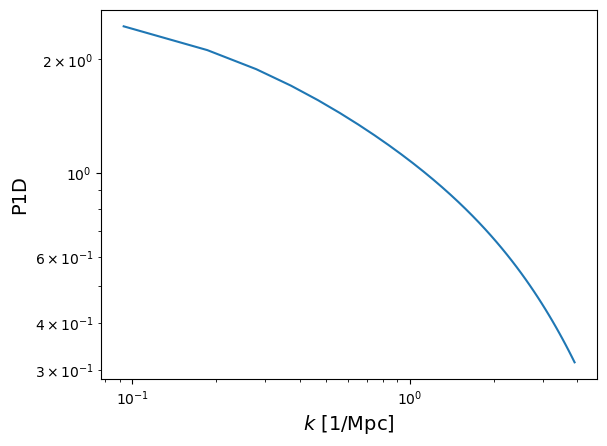

In [25]:
# test emulator by making simple plot
p1d = emulator_nn.emulate_p1d_Mpc(testing_data[0],kMpc)
plt.plot(kMpc,p1d)
plt.xlabel(r'$k$ [1/Mpc]', fontsize = 14)
plt.ylabel(r'P1D', fontsize = 14)

plt.xscale('log')
plt.yscale('log')